<a href="https://colab.research.google.com/github/eszterurban/NLP/blob/main/beadand%C3%B3_modell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dalszöveg hangulata soronként

# Installációk és importok

In [2]:
!pip install transformers

In [3]:
from transformers import pipeline

# A zene amit most megvizsgálunk

In [4]:
artist = "Azahriah"
song = "Hessdalen"

In [5]:
lyrics = """I stand in your arms
Guide me from the secrets of this world
I got a fear from the unknown
One day i will leave earth
So good lord take me home

Well I’m waiting impatiently too see
Everything we never knew
This gateway of my mind
Thats my only way to You

And heaven will be there

Just let me slip through
these concrete walls
Or let me kill those lies
And now im
truly yours and
I’m feelin alive
Feelin alright

Now i did not came
All this way to loose
Maybe that voice in my head
Said the truth
What would i see
What would i be
When they bury my body
What would you feel
What does it mean if you love
What does it mean if you need me
Why would i care if you leave me
Im better alone

Just try to keep me under
Move me further
Let me lose myself
And then show me the truth
Try to make me wonder
Cause i can’t take much longer
So make me feel like I’m something
Make me feel like I’m more

Sometimes we feel so empty inside
Like we try to win the fight
What we already won

Just let me in the dark
My love
Just keep you in the dark
By my side

But now i know its true
You came right out of the blue
But the longer im with you
The crazier i feel

And now you know me too
Yeah i see it in your eyes
Seein through what i demise
Seein through i’ve became
So better show me

My
My only way to see
My
I can’t find peace
My
Yeah that’s my only chance to seize your light
So never let me go

My
My only way to see
My
I can’t find peace
My
Yeah that’s my only chance to seize your light
So never let me go"""

# Ez a modell egy HuggingFace modell ami több nyelvhez is használható. https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment

In [6]:
specific_model = pipeline(model="nlptown/bert-base-multilingual-uncased-sentiment")

(…)cased-sentiment/resolve/main/config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

(…)iment/resolve/main/tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

(…)uncased-sentiment/resolve/main/vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

(…)ent/resolve/main/special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

# A szöveg soronkénti elemzése

In [7]:
lines = lyrics.split('\n')
line_sentiments = []

In [8]:
for line in lines:
    sentiment_score = specific_model(line)[0]['score']
    print(f"'{line}': {sentiment_score}")

'I stand in your arms': 0.5892654061317444
'Guide me from the secrets of this world': 0.6289181709289551
'I got a fear from the unknown': 0.3497735559940338
'One day i will leave earth': 0.45854997634887695
'So good lord take me home': 0.7096993327140808
'': 0.2846149206161499
'Well I’m waiting impatiently too see': 0.3567422926425934
'Everything we never knew': 0.6712425351142883
'This gateway of my mind': 0.7848967909812927
'Thats my only way to You': 0.3085944950580597
'': 0.2846149206161499
'And heaven will be there': 0.5875338315963745
'': 0.2846149206161499
'Just let me slip through': 0.36988288164138794
'these concrete walls': 0.45986413955688477
'Or let me kill those lies': 0.37770822644233704
'And now im': 0.3605646789073944
'truly yours and': 0.9043108224868774
'I’m feelin alive': 0.6448209285736084
'Feelin alright': 0.38744059205055237
'': 0.2846149206161499
'Now i did not came': 0.5719702839851379
'All this way to loose': 0.5498806238174438
'Maybe that voice in my head': 0.

# A szöveg elemzésének átalakítása szöveges formába

In [9]:
def map_to_sentiment_label(label):
    if label < 0.3:
        return "Negative"
    elif label < 0.7:
        return "Neutral"
    else:
        return "Positive"

In [10]:
for line in lines:
  if line.strip():
    sentiment_score = specific_model(line)[0]['score']
    sentiment_label = map_to_sentiment_label(sentiment_score)
    line_sentiments.append(sentiment_label)
    print(f"'{line}': {sentiment_label}")

'I stand in your arms': Neutral
'Guide me from the secrets of this world': Neutral
'I got a fear from the unknown': Neutral
'One day i will leave earth': Neutral
'So good lord take me home': Positive
'Well I’m waiting impatiently too see': Neutral
'Everything we never knew': Neutral
'This gateway of my mind': Positive
'Thats my only way to You': Neutral
'And heaven will be there': Neutral
'Just let me slip through': Neutral
'these concrete walls': Neutral
'Or let me kill those lies': Neutral
'And now im': Neutral
'truly yours and': Positive
'I’m feelin alive': Neutral
'Feelin alright': Neutral
'Now i did not came': Neutral
'All this way to loose': Neutral
'Maybe that voice in my head': Neutral
'Said the truth': Negative
'What would i see': Neutral
'What would i be': Neutral
'When they bury my body': Negative
'What would you feel': Neutral
'What does it mean if you love': Neutral
'What does it mean if you need me': Negative
'Why would i care if you leave me': Neutral
'Im better alone': 

# A dal szemléltetése

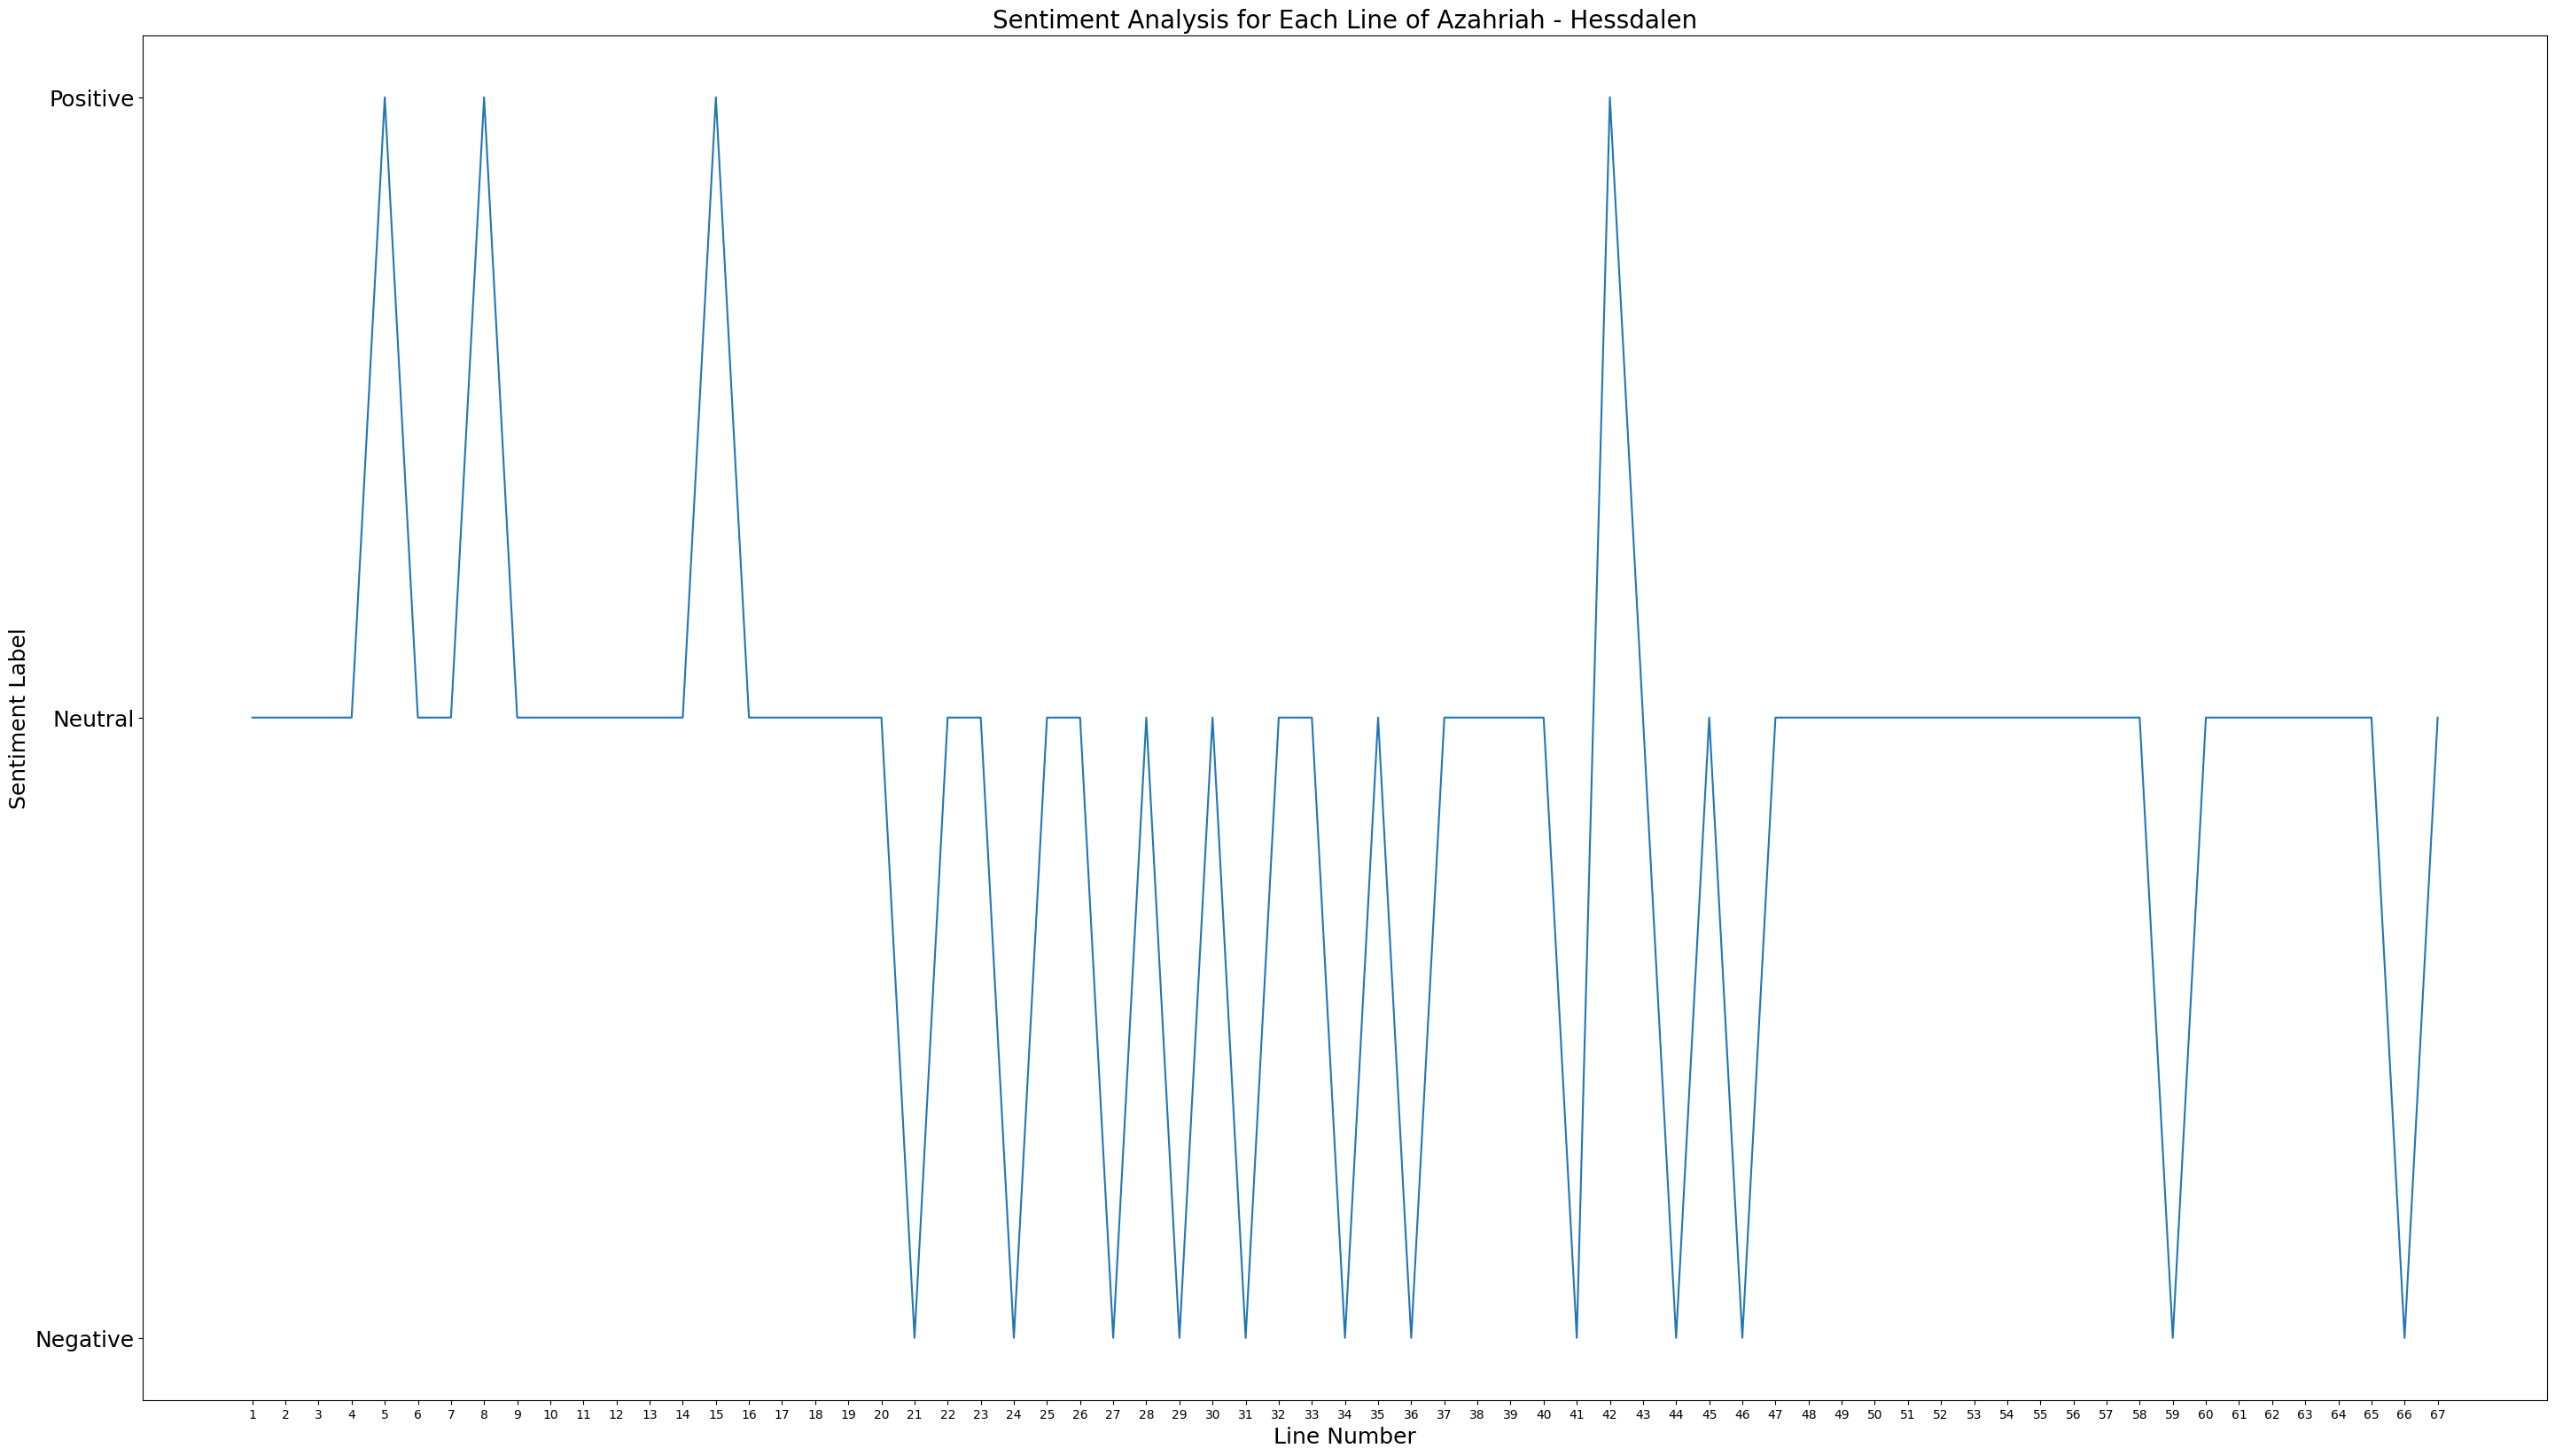

In [11]:
import matplotlib.pyplot as plt

x = range(1, len(line_sentiments) + 1)
y = line_sentiments

sentiment_labels = ["Negative", "Neutral", "Positive"]
sentiment_mapping = {label: i for i, label in enumerate(sentiment_labels)}

y_numeric = [sentiment_mapping[sentiment] for sentiment in y]

plt.figure(figsize=(35, 20))
plt.plot(x, y_numeric)
plt.xlabel('Line Number', fontsize=18)
plt.ylabel('Sentiment Label', fontsize=18)
plt.title(f"Sentiment Analysis for Each Line of {artist} - {song}", fontsize=20)
plt.xticks(x)
plt.yticks(range(3), sentiment_labels, fontsize=18)
plt.show()